In [ ]:
"""
看到各种不同的细节

"""

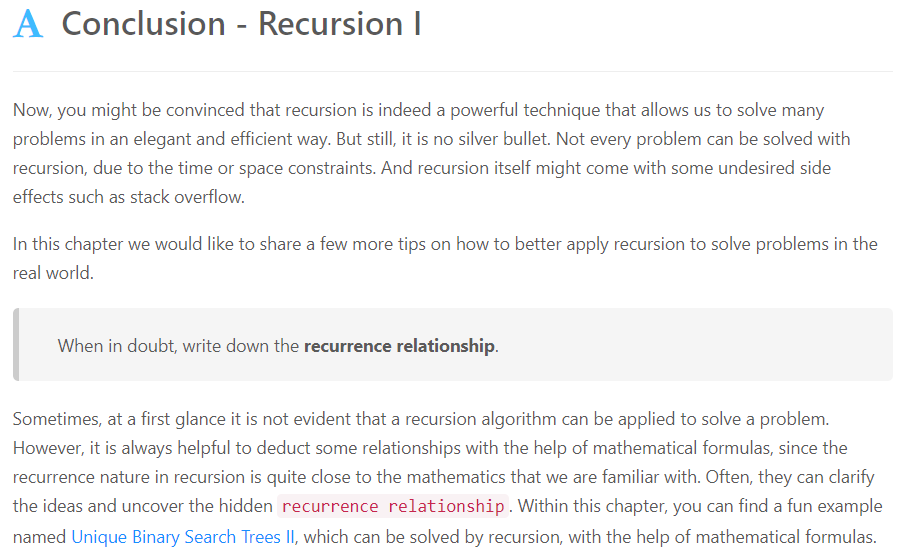

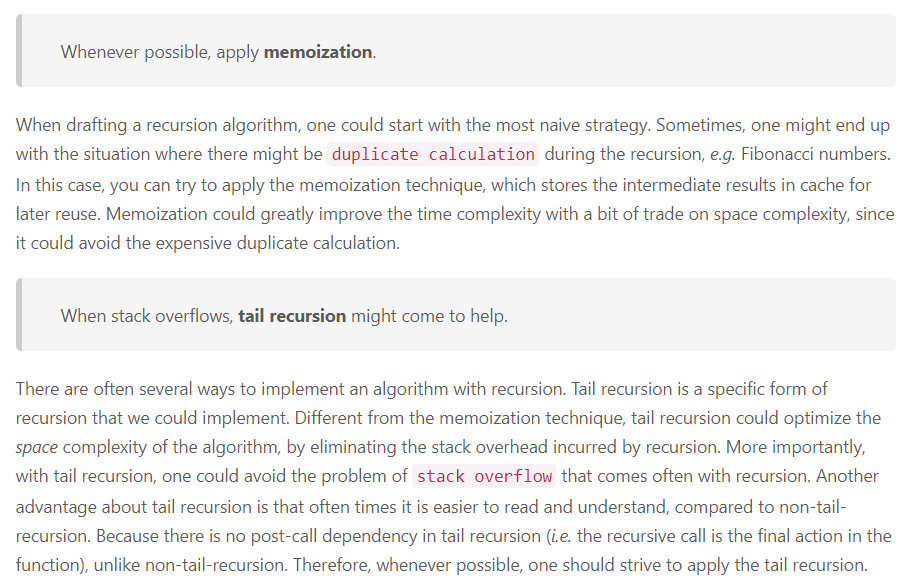

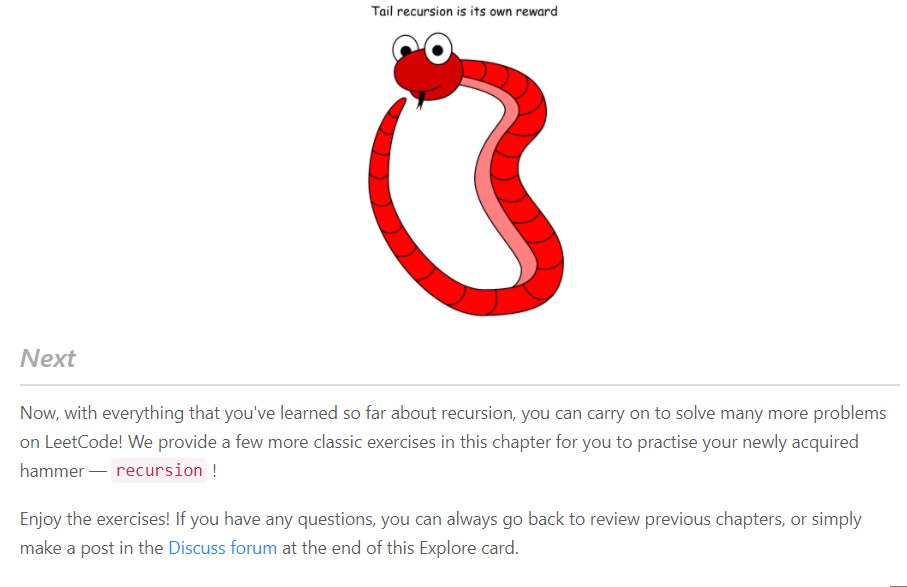

## Merge Two Sorted Lists

https://leetcode.com/explore/learn/card/recursion-i/253/conclusion/2382/

Merge two sorted linked lists and return it as a sorted list. The list should be made by splicing together the nodes of the first two lists.

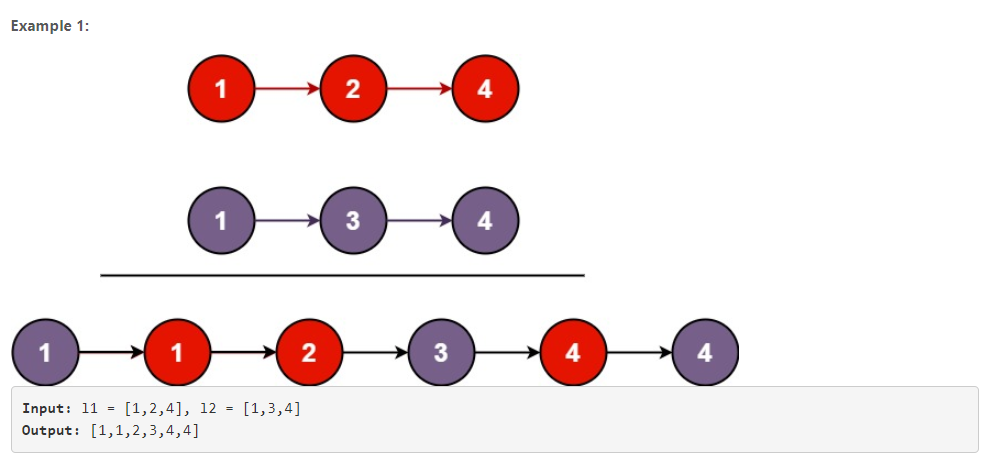

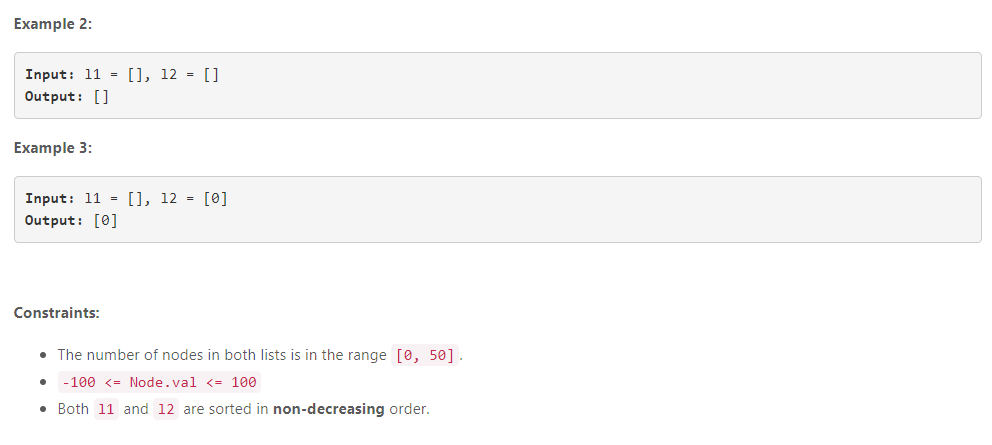

##### Accepted Recursion

```cpp
/**
 * Definition for singly-linked list.
 * struct ListNode {
 *     int val;
 *     ListNode *next;
 *     ListNode() : val(0), next(nullptr) {}
 *     ListNode(int x) : val(x), next(nullptr) {}
 *     ListNode(int x, ListNode *next) : val(x), next(next) {}
 * };
 */
class Solution {
public:
    
    
    void helper(ListNode* root, ListNode* l1, ListNode* l2){
        if(!l1){
            root->next=l2;
            return;
        }
        
        if(!l2){
            root->next=l1;
            return;
        }
        
        if(l1->val<=l2->val){
            root->next = new ListNode(l1->val);
            l1 = l1->next;
        }else{
            root->next = new ListNode(l2->val);
            l2 = l2->next;
        } 
        helper(root->next, l1, l2);
               
    }

    ListNode* mergeTwoLists(ListNode* l1, ListNode* l2) {
        ListNode* root;
        if(!l1){
            return l2;
        }
        
        if(!l2){
            return l1;
        }
        
        if(l1->val<=l2->val){
            root = new ListNode(l1->val);
            l1 = l1->next;
        }else{
            root = new ListNode(l2->val);
            l2 = l2->next;
        }
        
        helper(root, l1, l2);
        
        return root;
        
        
        
    }
};

```

### Solution
https://leetcode.com/problems/merge-two-sorted-lists/solution/

##### Approach 1: Recursion
```java
class Solution {
    public ListNode mergeTwoLists(ListNode l1, ListNode l2) {
        if (l1 == null) {
            return l2;
        }
        else if (l2 == null) {
            return l1;
        }
        else if (l1.val < l2.val) {
            l1.next = mergeTwoLists(l1.next, l2);
            return l1;
        }
        else {
            l2.next = mergeTwoLists(l1, l2.next);
            return l2;
        }

    }
}

```

##### Approach 2: Iteration
```java
class Solution {
    public ListNode mergeTwoLists(ListNode l1, ListNode l2) {
        // maintain an unchanging reference to node ahead of the return node.
        ListNode prehead = new ListNode(-1);

        ListNode prev = prehead;
        while (l1 != null && l2 != null) {
            if (l1.val <= l2.val) {
                prev.next = l1;
                l1 = l1.next;
            } else {
                prev.next = l2;
                l2 = l2.next;
            }
            prev = prev.next;
        }

        // At least one of l1 and l2 can still have nodes at this point, so connect
        // the non-null list to the end of the merged list.
        prev.next = l1 == null ? l2 : l1;

        return prehead.next;
    }
}
```

## K-th Symbol in Grammar

https://leetcode.com/explore/learn/card/recursion-i/253/conclusion/1675/

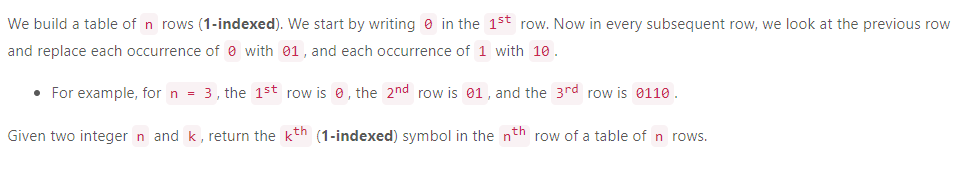

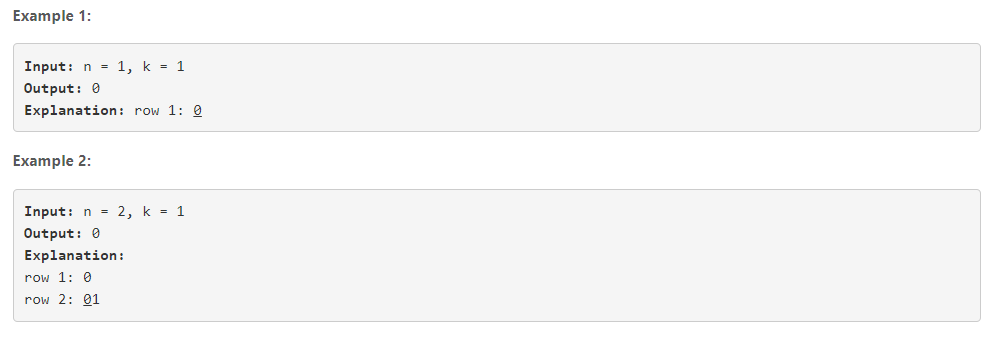

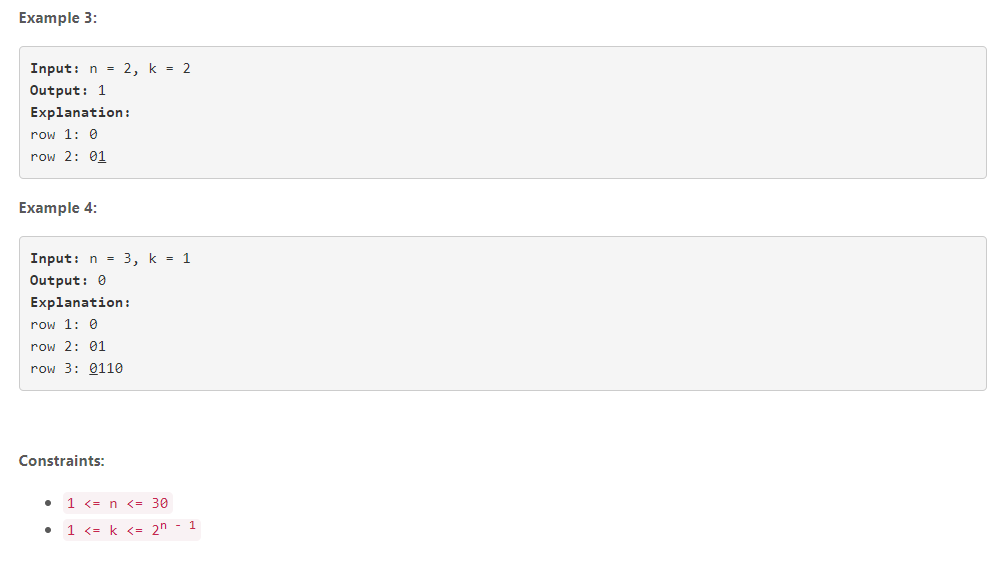

##### Bad Brute Force
```cpp
class Solution {
public:
    
    
    string helper(string s){
        string new_s = "";
        for(auto s_ : s){
            if(s_=='0'){
                new_s+="01";
            }else{
                new_s+="10";
            }
        }
        return new_s;
    }
    
    
    
    
    int kthGrammar(int n, int k) {
        string s = "0";
        while(n>0){
            n--;
            s = helper(s);
            // cout<<s<<" s\n";
        }
        // cout<<s<<" s\n";
        return int(s[k-1])-48;
        
    }
};
```

##### Accepted Recursion
```cpp
class Solution {
public:
    int helper(int n, int k){
        if(n==1){
            if(k==1){
            return 0;
            }else{
                return -1;
            }
        }
        
        if(n==2){
            if(k==1){
                return 0;
            }else{
                return 1;
            }
        }
        
        int s;
        if(k%2==0){
            s = helper(n-1, k/2);
            if(s==0){
                return 1;
            }else{
                return 0;
            }
        }else{
            s = helper(n-1, (k+1)/2);
            if(s==0){
                return 0;
            }else{
                return 1;
            }
        }

    }

    int kthGrammar(int n, int k) {
        return helper(n,k);
        
    }
};
```

## Unique Binary Search Trees II

https://leetcode.com/explore/learn/card/recursion-i/253/conclusion/2384/

Given an integer n, return all the structurally unique BST's (binary search trees), which has exactly n nodes of unique values from 1 to n. Return the answer in any order.

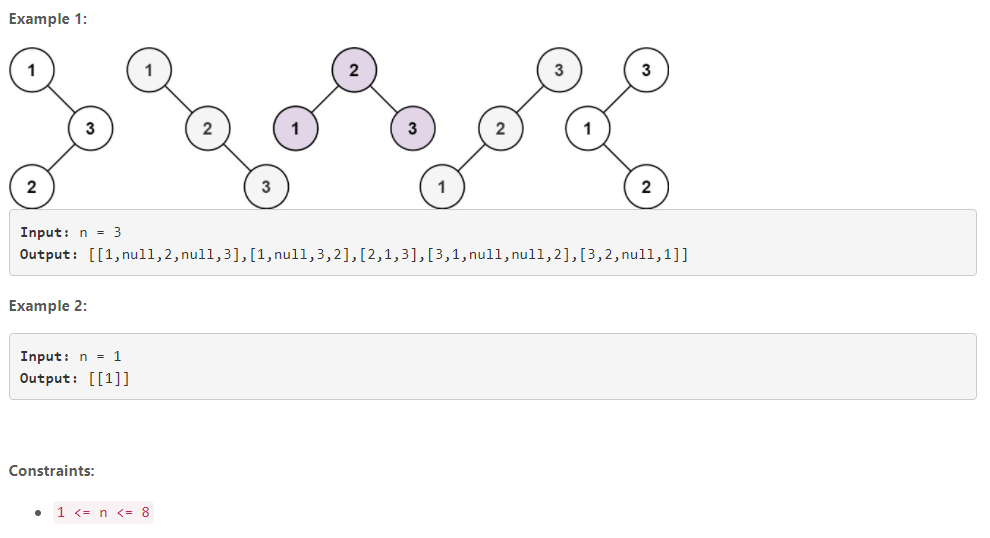

##### V1 failed, need pre-knowledge of BST
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    
    vector<TreeNode*> helper(int n){
        vector<TreeNode*> v;
        TreeNode* root;
        
        if(n==0){
            v.push_back(nullptr);
            return v;
        }
        
        if(n==1){
            root = new TreeNode(1);
            v.push_back(root);
            return v;
        }
        
        // cout<<" tata\n";
        for(int i=0; i<=n-1;i++){
            for(auto node_left: helper(n-1-i)){
                for(auto node_right: helper(i)){
                    root = new TreeNode(n);
                    root->left = node_left;
                    root->right = node_right;
                    v.push_back(root);
                }
            }
        }
        
        return v;
    }
    
    vector<TreeNode*> generateTrees(int n) {        
        return helper(n);
    }
};
```